In [4]:
import numpy
import matplotlib.pyplot as plt 
import pandas
import mglearn
import scipy

import sklearn
import sklearn.ensemble  # import seperatley otherwise sub module won't be imported

import graphviz
import mpl_toolkits.mplot3d as plt3d

In [2]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(numpy.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [3]:
cancer = sklearn.datasets.load_breast_cancer();

In [4]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer.data, cancer.target, random_state=42);

In [5]:

for i in range(1,16,2):
    tree = sklearn.tree.DecisionTreeClassifier(random_state=0,max_depth=i);
    tree.fit(X_train, y_train,);
    print(f"{i}")
    print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)));
    print("Accuracy on test set: {:.3f}\n".format(tree.score(X_test,y_test)));

print("Default max depth");
tree = sklearn.tree.DecisionTreeClassifier(random_state=0);
tree.fit(X_train, y_train);
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)));
print("Accuracy on test set: {:.3f}\n".format(tree.score(X_test,y_test)));

1
Accuracy on training set: 0.923
Accuracy on test set: 0.895

3
Accuracy on training set: 0.972
Accuracy on test set: 0.958

5
Accuracy on training set: 0.995
Accuracy on test set: 0.958

7
Accuracy on training set: 1.000
Accuracy on test set: 0.930

9
Accuracy on training set: 1.000
Accuracy on test set: 0.930

11
Accuracy on training set: 1.000
Accuracy on test set: 0.930

13
Accuracy on training set: 1.000
Accuracy on test set: 0.930

15
Accuracy on training set: 1.000
Accuracy on test set: 0.930

Default max depth
Accuracy on training set: 1.000
Accuracy on test set: 0.930



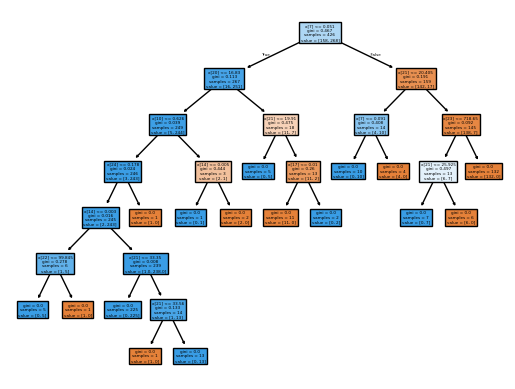

In [6]:
sklearn.tree.plot_tree(tree,filled=True)
plt.savefig("Cancer Decision Tree.png", dpi = 700)

In [7]:
print("Feature importances:\n{}".format(tree.feature_importances_));


Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ]


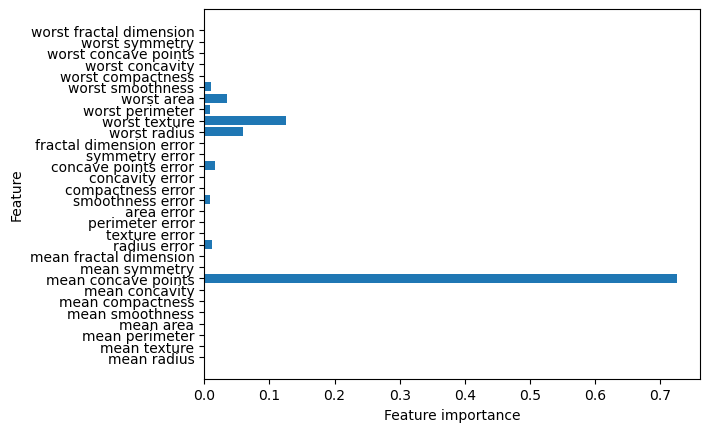

In [8]:
plot_feature_importances_cancer(tree);

Feature importances: [0. 1.]


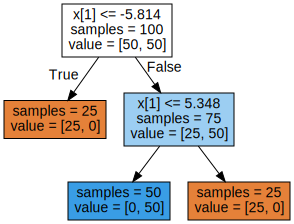

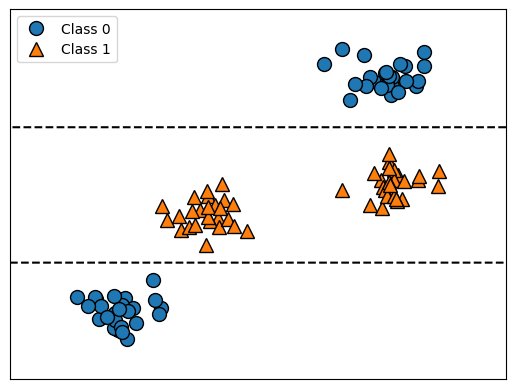

In [9]:
mglearn.plots.plot_tree_not_monotone()

In [10]:
X, y = sklearn.datasets.make_moons(n_samples=100, noise=0.25, random_state=3);
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, stratify=y, random_state=42);

forest = sklearn.ensemble.RandomForestClassifier(n_estimators=5, random_state=3);
forest.fit(X_train, y_train);

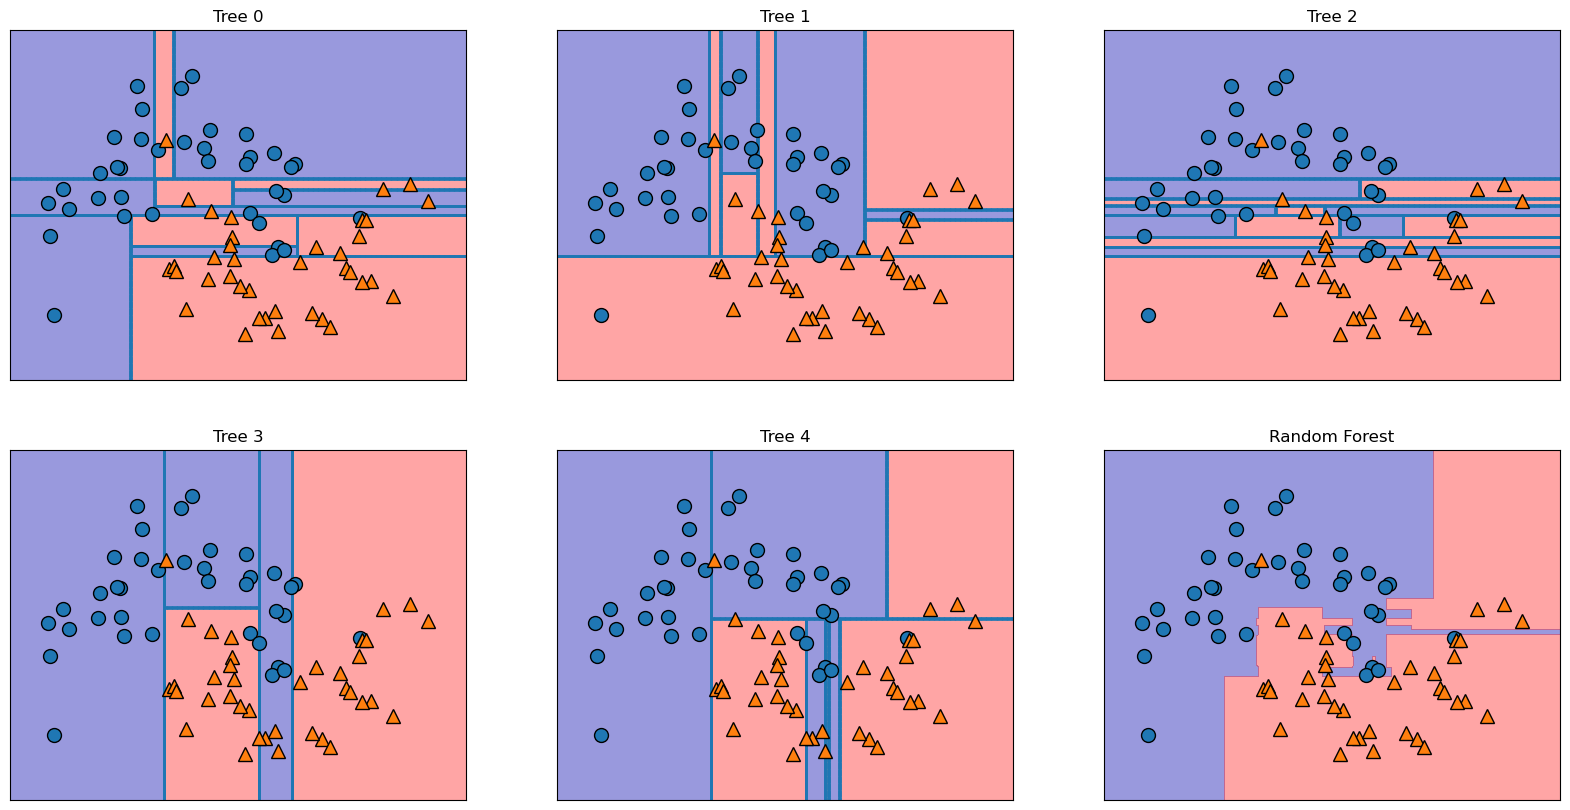

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(20,10));

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i));
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax);

axes[-1,-1].set_title("Random Forest");
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train);
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1], alpha=.4);

In [12]:
cancer = sklearn.datasets.load_breast_cancer();
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer.data, cancer.target, random_state=0);
forest = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=0,max_features=8);
forest.fit(X_train,y_train);
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)*100))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)*100))

Accuracy on training set: 100.000
Accuracy on test set: 97.203


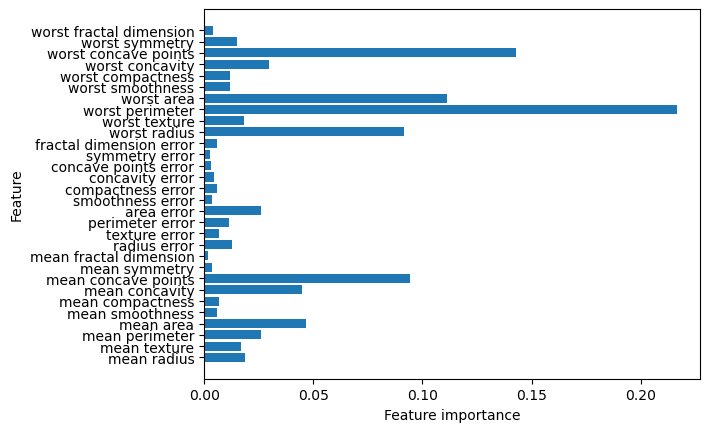

In [13]:
plot_feature_importances_cancer(forest);

## Kernelized Support Vector Machines

In [172]:
X, y = sklearn.datasets.make_blobs(centers=4, random_state=8);
y %= 2;
linearSVC = sklearn.svm.LinearSVC().fit(X,y);

In [173]:
%matplotlib inline

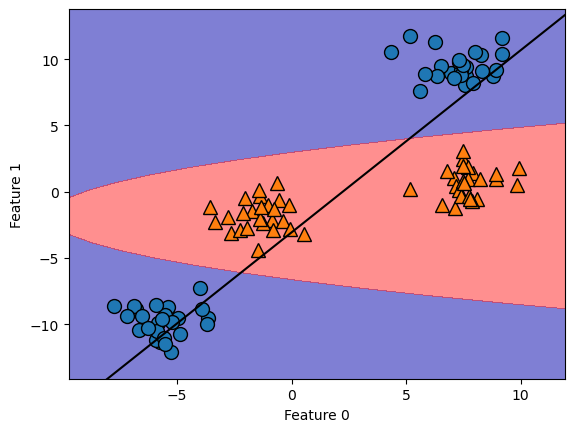

In [134]:

mglearn.plots.plot_2d_separator(linearSVC, X);
mglearn.discrete_scatter(X[:,0], X[:,1], y);
plt.xlabel("Feature 0");


plt.ylabel("Feature 1");
xx = numpy.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50);
yy = numpy.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50);

X_new = numpy.hstack([X,X[:,1:]**2]);
XX,YY = numpy.meshgrid(xx,yy);
linear_svm_3d = sklearn.svm.LinearSVC().fit(X_new, y);
coeff, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_;

ZZ = YY ** 2;
dec = linear_svm_3d.decision_function(numpy.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap = mglearn.cm2,alpha=0.5);
plt.xticks(range(-15,20,5));
plt.yticks(range(-15,20,5));
plt.xlim([XX.min(),XX.max()]);
plt.ylim([YY.min(),YY.max()]);

In [128]:
numpy.c_[XX.ravel(), YY.ravel(), ZZ.ravel()].shape

(2500, 3)

In [114]:
YY.shape

(50, 50)

In [174]:
%matplotlib 

Using matplotlib backend: QtAgg


In [175]:

X_new = numpy.hstack([X,X[:,1:]**2]);

fig = plt.figure();
ax = plt.axes(projection='3d', elev=-152, azim=-26);
mask = y == 0;

ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], s = 60, color = "blue");
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], marker='^', s=60, color = "red");
ax.set_xlabel("f$_0$");
ax.set_ylabel("f$_1$");
ax.set_zlabel("(f$_1)^{2}$");

xx = numpy.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50);
yy = numpy.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50);

XX,YY = numpy.meshgrid(xx,yy);
linear_svm_3d = sklearn.svm.LinearSVC().fit(X_new, y);
coeff, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_;

ZZ = (coeff[0] * XX + coeff[1]*YY + intercept) / -coeff[2];

ax.plot_surface(XX, YY, ZZ,rstride=8, cstride=8, alpha=0.3, color = "orange");

In [184]:
%matplotlib inline

Text(0, 0.5, 'Feature 1')

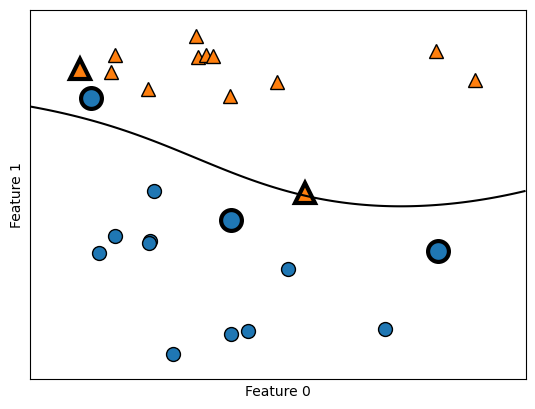

In [171]:
X, y = mglearn.tools.make_handcrafted_dataset();
svm = sklearn.svm.SVC( kernel = 'rbf', C=10, gamma = .1).fit(X,y);
mglearn.plots.plot_2d_separator(svm, X, eps=.5);
mglearn.discrete_scatter(X[:,0], X[:,1], y);

sv = svm.support_vectors_;
sv_labels = svm.dual_coef_.ravel() > 0;

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3);
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

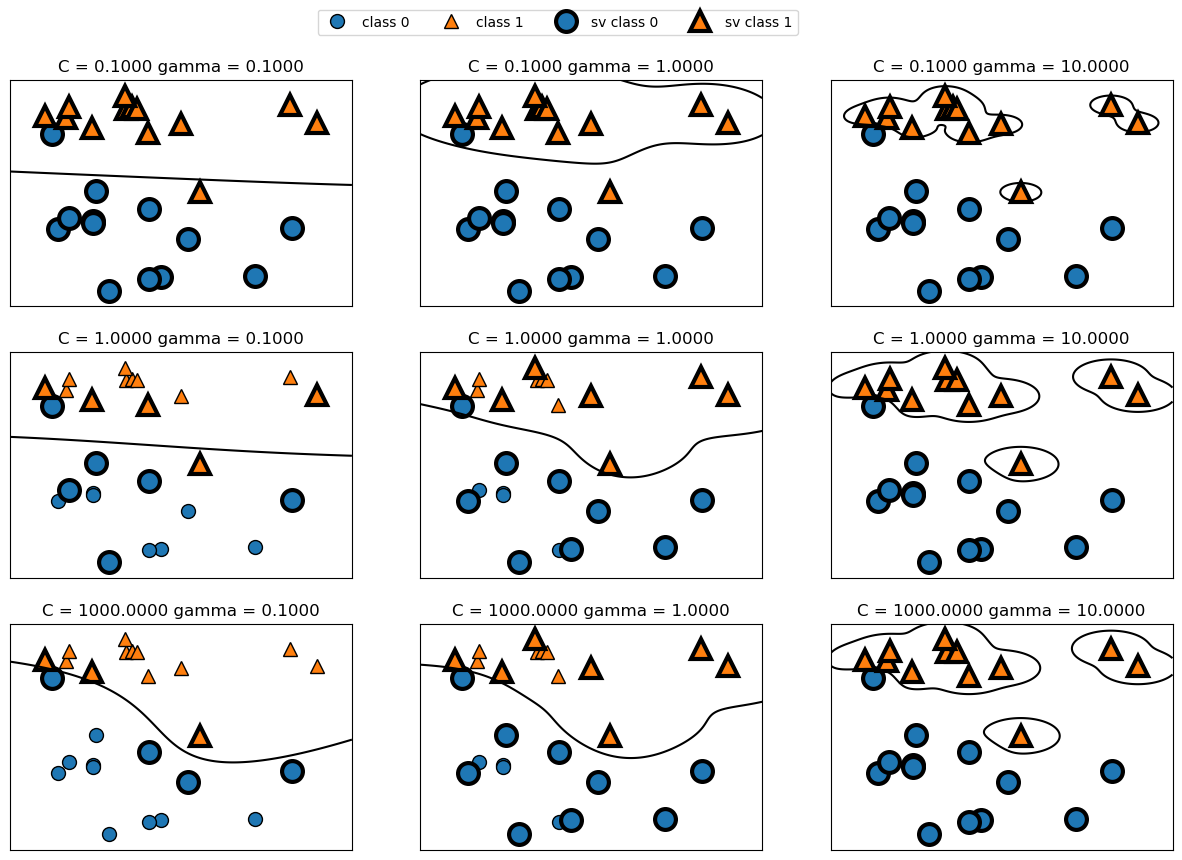

In [168]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],ncol=4, loc=(.9, 1.2));

Accuracy on training set: 0.90
Accuracy on test set: 0.94


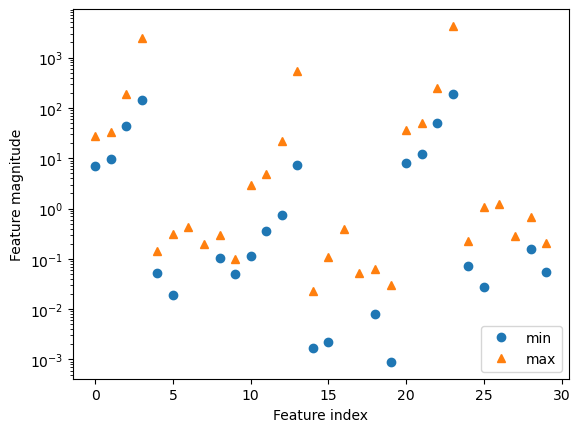

In [196]:
cancer = sklearn.datasets.load_breast_cancer();

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer.data, cancer.target, random_state=0);

svc = sklearn.svm.SVC().fit(X_train, y_train);

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

plt.plot( range(0, X_train.min(axis=0).shape[0]), X_train.min(axis=0), 'o', label="min");
plt.plot( range(0, X_train.min(axis=0).shape[0]), X_train.max(axis=0), '^', label="max");
plt.legend(loc=4);
plt.xlabel("Feature index");
plt.ylabel("Feature magnitude");
plt.yscale("log");

In [241]:
min_on_training = X_train.min(axis=0);
range_on_training = (X_train - min_on_training).max(axis=0);
X_train_scaled = (X_train - min_on_training)/ range_on_training;

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

min_on_test = X_test.min(axis=0);
range_on_test = (X_test - min_on_test).max(axis=0);
X_test_scaled = (X_test - min_on_test)/ range_on_test;



Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [251]:
svc = sklearn.svm.SVC(C=1).fit(X_train_scaled, y_train);
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.909
